<a href="https://colab.research.google.com/github/giladvi100/Data-Gaming/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('./Dataset/Cleaned Data 2.csv')
original_data = data  # Keeping the original dataset as well in case we would need to use the removed columns.
data.head()


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,CyberConnect2,T
1,.hack//Mutation Part 2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,CyberConnect2,T
2,.hack//Outbreak Part 3,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,CyberConnect2,T
3,[Prototype],2009,Action,Activision,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,Radical Entertainment,M
4,[Prototype],2009,Action,Activision,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,Radical Entertainment,M


# Visualization 1: Distribution of User Score

### Why This Visualization Was Chosen?

####1. Understanding the Target Variable:

Since 'Critic score' is the dependent (y) variable for the linear model, it’s crucial to understand its distribution before moving forward.

This helps us identify the range, central tendency (e.g., mean, median), and spread of values, which are foundational for building an effective model.

####2. Checking for Outliers:

A histogram is one of the best tools for spotting extreme outliers or unusual values that might skew the model's results.

By visualizing the frequency of each 'Critic score' range, we can ensure there aren’t any anomalies that require additional pre-processing.

####3. Feature Relevance:

Visualizing the target variable gives us an idea of how other features might relate to it. For example, we can hypothesize how predictors might influence the peaks or variability in 'Critic score'.


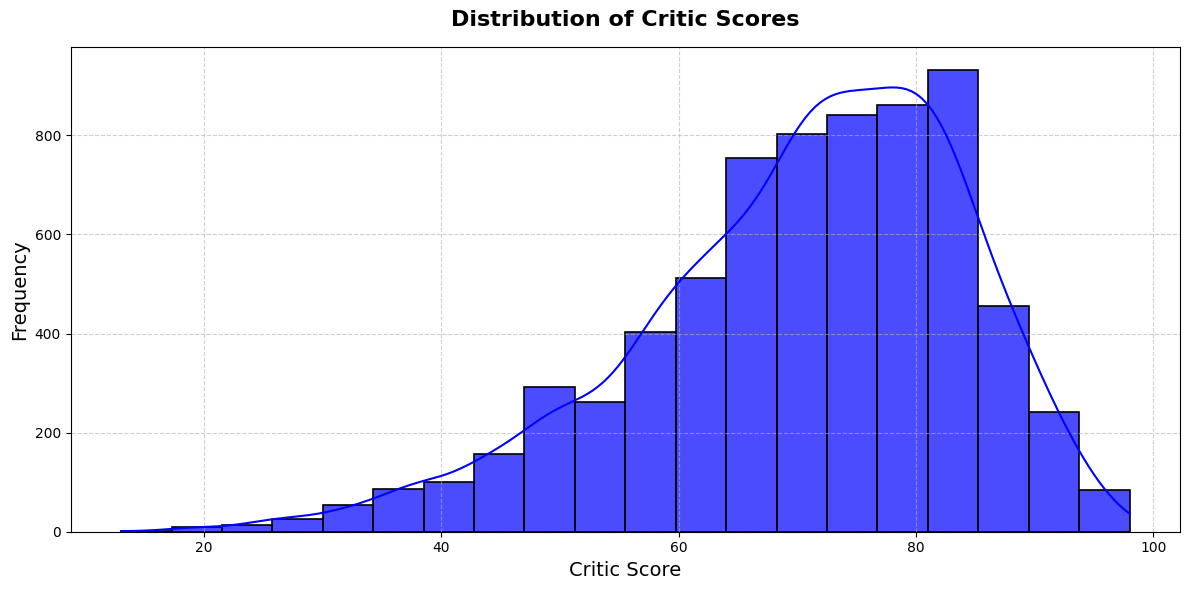

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(
    original_data['Critic_Score'],
    kde=True,
    bins=20,
    color='blue',
    alpha=0.7,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Distribution of Critic Scores", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Critic Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


### Insights from the Visualization
####  1. Distribution Shape:
The histogram shows a bell shape shifted to the right with a tail to the left, indicating the data is left-skewed.
This means most critic scores are concentrated around higher values, but there are some lower scores pulling the mean down
This is ideal for linear regression, as normality is one of its key assumptions.

#### 2. Range of Values:
The majority of critic scores fall within a relatively high range (peak of the bell), suggesting that most items tend to receive favorable or above-average reviews. The tail to the left represents outliers or rare occurrences of extremely low critic scores.

#### 3. Central Tendency:
The peak of the distribution indicates that the mean or median rating is likely around the middle range, where most users consistently rate.

#### 4. Outliers and Skewness:
The left tail indicates a minority of extreme cases (low scores) that might be caused by poorly reviewed items or unusual circumstances.

#### 5. Implications for Modeling:
The left-skewed distribution suggests that the target variable (critic score) is not normally distributed.
Models like linear regression, which assume normality in residuals, might perform poorly. More flexible models (e.g., random forests, XGBoost) that do not rely on such assumptions might be better suited.



# Visualization 2: Regional Sales vs. Critic Score

### Why is this Feature Significant?
To check for correlation and understand the relationship between sales and critic scores in each country, we present the following plot:

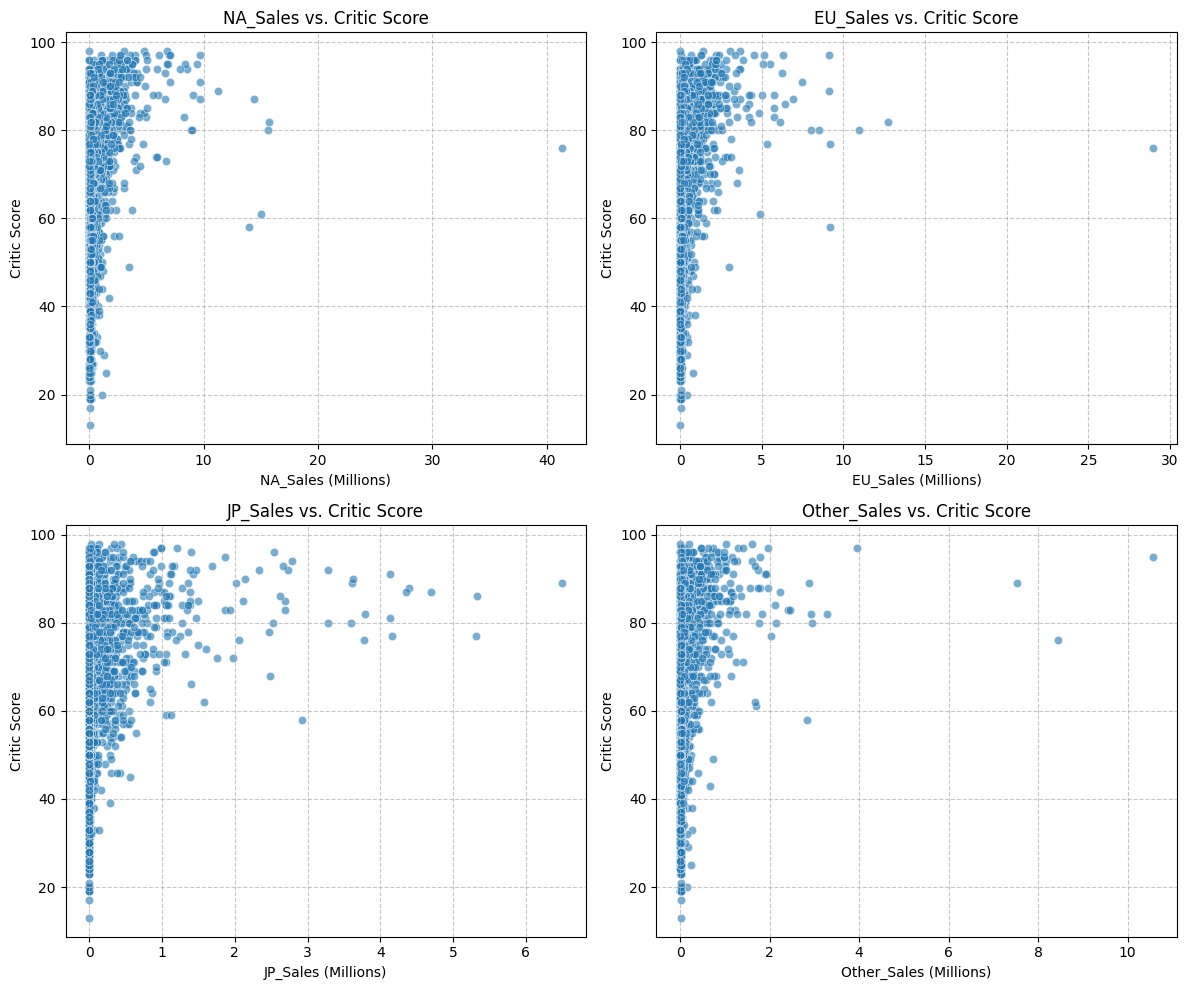

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for ax, region in zip(axes.flatten(), regions):
    sns.scatterplot(x=region, y='Critic_Score', data=data, alpha=0.6, ax=ax)
    ax.set_title(f'{region} vs. Critic Score')
    ax.set_xlabel(f'{region} (Millions)')
    ax.set_ylabel('Critic Score')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Why is it Chosen as a Key Visualization?
From this plot, we can observe a correlation between sales and critic scores. However, we also notice that the data is distributed differently across countries. The "spread" refers to how scattered the sales are for a given rating. This suggests that in Japan (JP) and "Other" regions, critic scores have less predictive power for sales compared to the US and NA.

Possible reasons for this variation include:

Cultural Differences: Players in Japan and "Other" regions may have distinct gaming preferences or tastes. For instance, niche or cult-classic games may achieve high sales in Japan despite having lower critic scores.
Different Review Preferences: The way review scores are perceived may differ across regions. In Japan (and potentially in "Other" regions), players might prioritize unique gameplay mechanics or specific features over overall review scores, leading to a wider spread in the data.

Model Complexity:
When trying to predict sales based on rating, we may need to use a different approach for JP and "Other" regions. Since the sales are more dispersed, the relationship is less clear and more difficult to model.

In the US and NA, a linear or simple model (like linear regression) might work well because the relationship is clear and consistent.

For JP and "Other", a non-linear model (like decision trees, random forests, or XGBoost) might be better suited to capture the varied relationship.

Separate Models for Different Regions:
Since the patterns differ by region, it might be useful to train separate models for each region instead of one global model. This approach can capture region-specific consumer behaviors and game performance.

Feature Engineering:
Consider including a "region" feature as part of the model if you plan to create a single, global model. This will help the model learn the differences between the markets.

# Visualization 3: User Score vs. Critic Score

### Why This Visualization Was Chosen?

This is a good plot to visualize the relationship between User Scores and Critic Scores. It allows as to see how closely the two scores are aligned and whether there is a linear relationship between them. The red line (trend line) provides a clear view of the general direction of the relationship, making it easy to spot patterns or deviations.

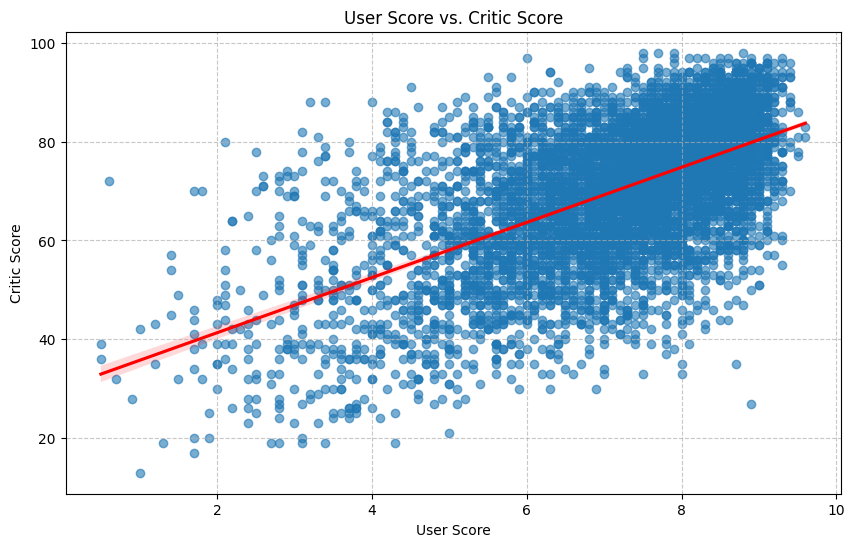

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='User_Score', y='Critic_Score', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('User Score vs. Critic Score')
plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

### Insights from the Visualization
It seems that there is a correlation between the User Score and Critic Score, but it is not very strong. The data points generally follow a direction, but with significant spread. Additionally, the red trend line does not follow the
𝑦
=
𝑥
line, indicating that one group (users or critics) tends to give higher or lower scores than the other.

Outliers:
We can observe points that are far from the red line, which may indicate the presence of outliers. These outliers could represent games that received significantly different scores from users compared to critics.

# Visualization 4: Features Correlation Heatmap

### Why This Visualization Was Chosen?
####1. Identify Relationships Between Features:

Helps to identify the strength and direction of relationships between numerical features, including the target variable (Critic score).

####2. Spot Multicollinearity:

Ensures that independent variables are not highly correlated with each other, which can harm model performance.

####3. Feature Selection:

Reveals features most strongly correlated with User Score, guiding which predictors to keep or prioritize.correlated, aiding in feature selection and model building.

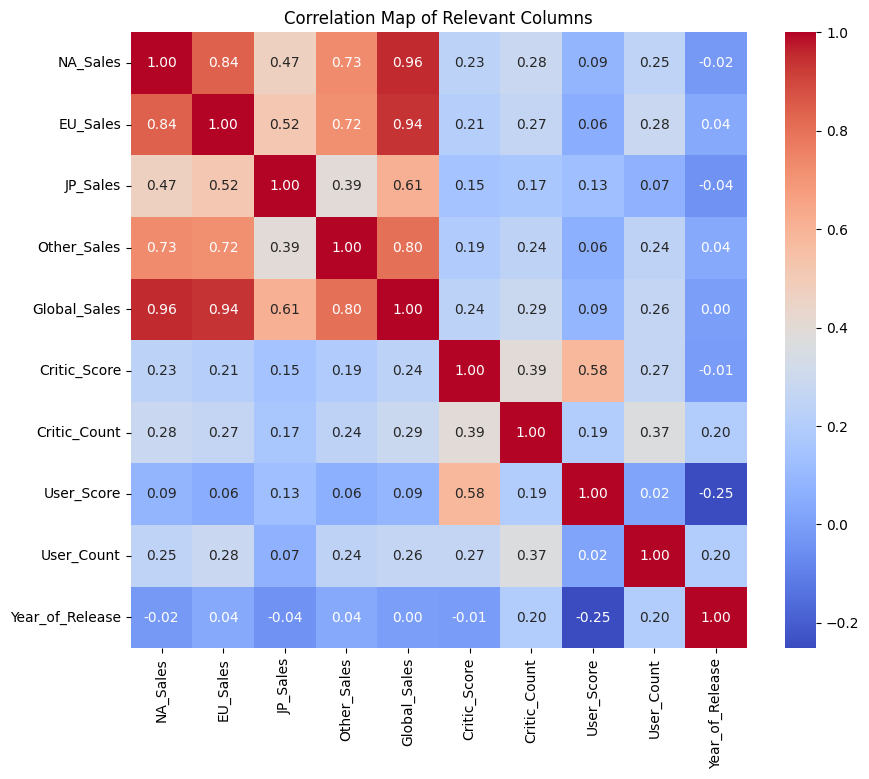

In [ ]:
relevant_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
                    'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Year_of_Release']

correlation_matrix = data[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title("Correlation Map of Relevant Columns")
plt.show()

### Insights from the Visualization
The heatmap is the best representation for examining feature relationships because it provides a visual summary of pairwise correlations in a compact and interpretable format. The use of color gradients allows for quick identification of strong positive or negative relationships, while numerical annotations provide precise values. This format is particularly effective for datasets with multiple features, as it enables you to assess all correlations simultaneously, rather than analyzing each pair individually, saving time and reducing complexity.

# Visualization 5: Critic Score by Genre

### Why is this Feature Significant?
We want to determine if there is any genre that tends to receive significantly higher or lower critic scores compared to others.

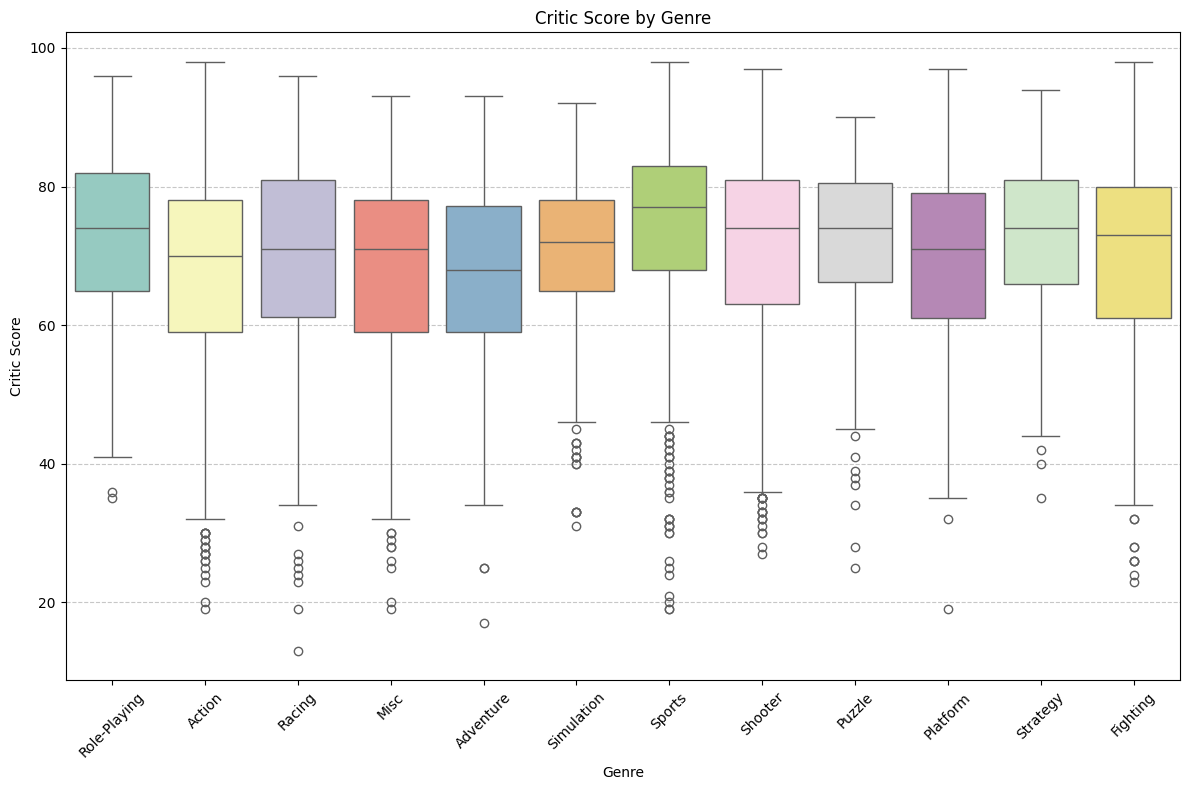

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Critic_Score', data=data, palette='Set3')
plt.title('Critic Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Critic Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can observe that the distribution of critic scores is similar across most genres. However, the Sports genre stands out with the highest number of outliers.

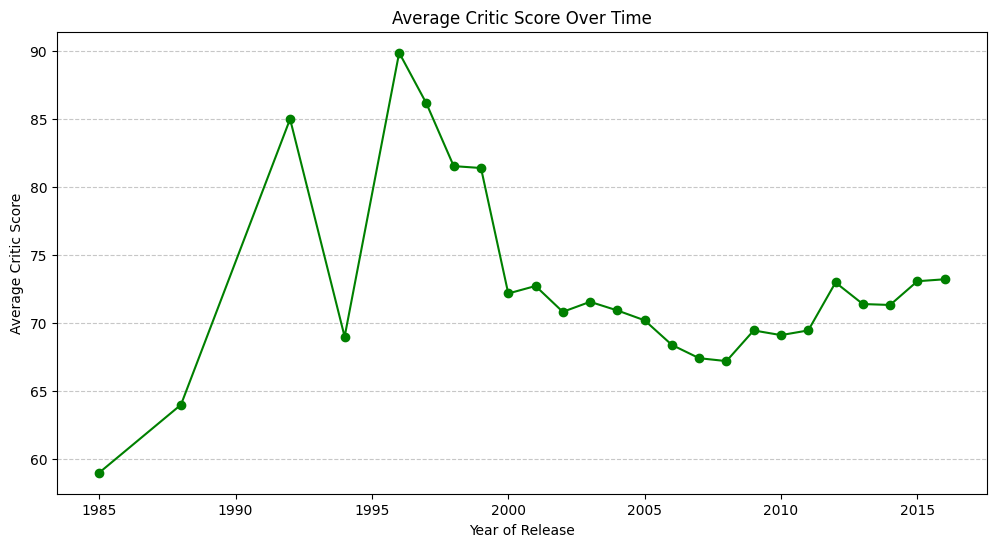

In [ ]:
plt.figure(figsize=(12, 6))
average_score_by_year = data.groupby('Year_of_Release')['Critic_Score'].mean()
average_score_by_year.plot(kind='line', marker='o', color='green')
plt.title('Average Critic Score Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Average Critic Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insights.

From the plot, we can observe two significant jumps in the years 1991 and 1997. After that, starting from the year 2000, the graph becomes smoother.

We can suggest that this behavior is due to breakthroughs in technology that made games much more engaging. For example, the rise of online video games in 1996 may explain the increase observed in the graph during that year. However, after people became accustomed to this innovation, the trend stabilized.

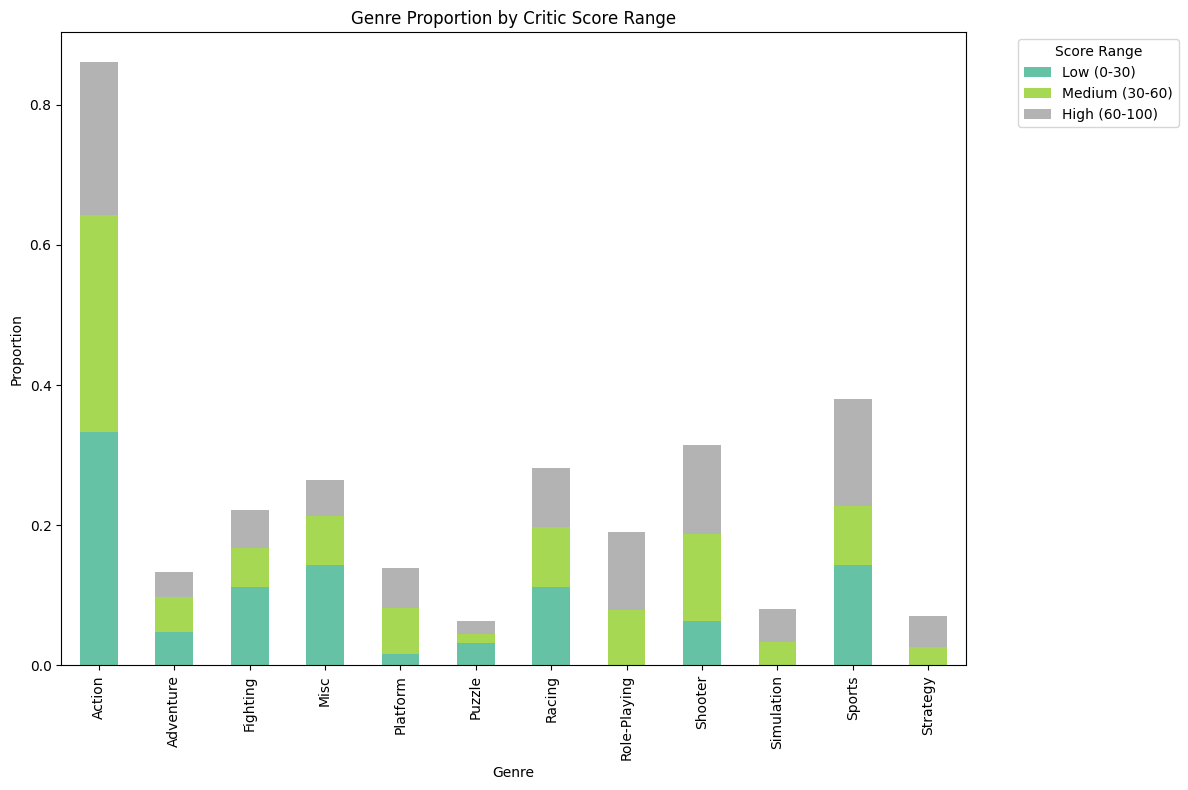

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

score_ranges = pd.cut(data['Critic_Score'], bins=[0, 30, 60, 100], labels=['Low (0-30)', 'Medium (30-60)', 'High (60-100)'])

genre_proportions = data.groupby(score_ranges)['Genre'].value_counts(normalize=True).unstack().T

genre_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Genre Proportion by Critic Score Range')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.legend(title='Score Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# preproccing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Apply one-hot encoding for non-ordinal categorical variables
categorical_columns = ['Name', 'Genre','Publisher', 'Developer', 'Rating']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Fill missing values (example: median for numeric, mode for categorical)
data = data.fillna(data.median(numeric_only=True))

# Split features and target
X = data.drop(columns=['Critic_Score'])
y = data['Critic_Score']

# Feature scaling for numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.columns = X_scaled_df.columns.str.replace(r'[<>,"\'\[\]\(\)\s]', '_', regex=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

model_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
}

# Basic Model Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Train XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model training complete.")

Model training complete.


# Results of the basic pipeline

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"RMSE: {rmse:.2f}k")
print(f"MAE: {mae:.2f}k")
print(f"R2 Score: {r2:.3f}")

Model Performance Metrics:
RMSE: 8.40k
MAE: 6.37k
R2 Score: 0.644


# Error Analysis
After running the basic model, we will analyze its errors to identify areas for improvement.

### A. Predicted vs Actual Price
The "Predicted vs Actual Price" plot is important for error analysis as it visually shows how closely the model’s predictions align with actual values. It helps identify systematic errors and assess model accuracy by how close the points are to the red dashed line. This enables the identification of areas where the model performs poorly and highlights specific weaknesses for improvement.

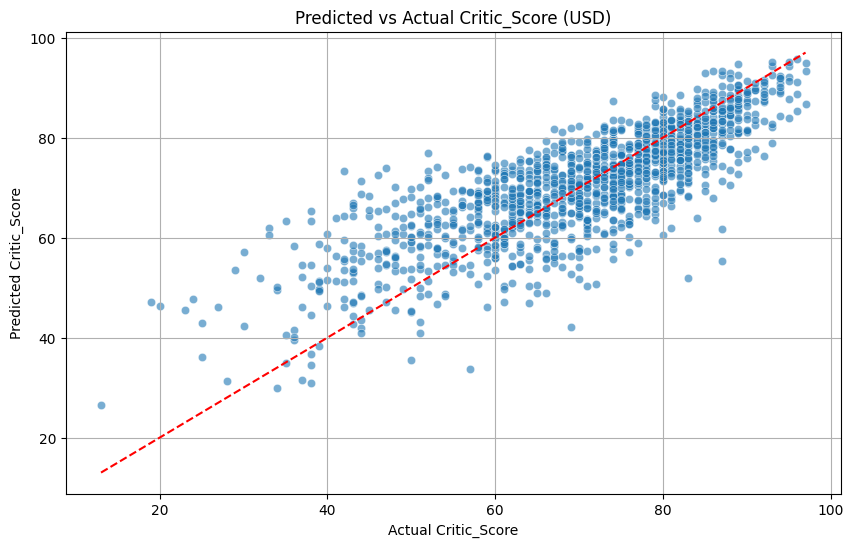

In [ ]:
# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Critic_Score (USD)")
plt.xlabel("Actual Critic_Score")
plt.ylabel("Predicted Critic_Score")
plt.grid(True)
plt.show()

#### Insights
The red line represents a linear regression line (best-fit line), and the points generally follow the same direction, it suggests that there is a linear relationship between the input features and the output target.

The points are widely spread around the line, the model may have high variance or low R² (coefficient of determination), meaning that the model is not capturing all the variability in the data.

However, the points are evenly spread above and below the line, the model may be appropriate, and the errors (residuals) are randomly distributed.

Outliers: some points are far from the line, they may be outliers that impact the model's fit. You may consider detecting and handling them.




### B. Error Distribution
The "Error Distribution" plot is crucial in error analysis as it highlights the spread, bias, and symmetry of residuals, helping identify systematic errors and outliers, and evaluate if the residuals follow a normal distribution—essential for assessing the model's assumptions and areas needing improvement.

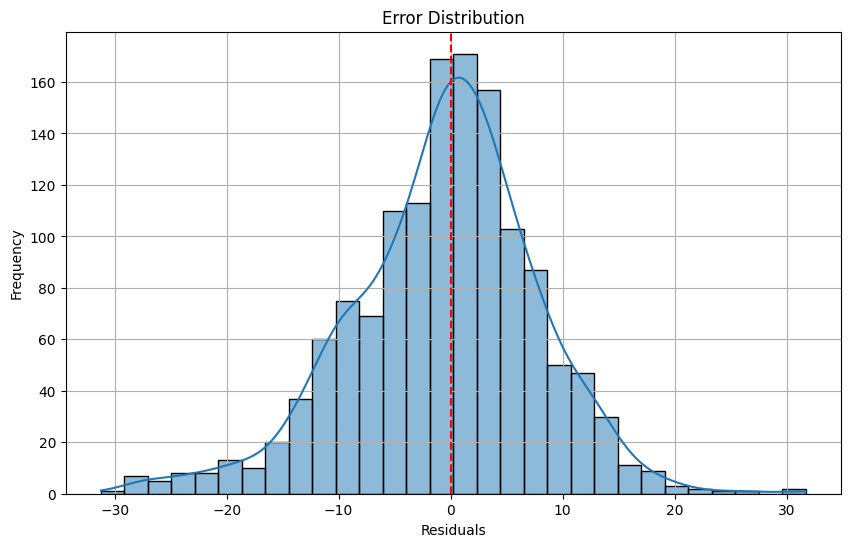

In [ ]:
# Calculate residuals
residuals = y_test - y_pred


# Plot Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual (Perfect Prediction)')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#### Insights
Shape of the Distribution:

The residuals are approximately bell-shaped but slightly skewed to the right.
This suggests that while most predictions are close to the actual values, there are instances where the model underpredicts or overpredicts the Critic_Score.

Mean Residuals:

The residuals are centered around zero (red dashed line), indicating that the model does not have significant bias in its predictions. This is a good sign, as it suggests the model is not systematically overpredicting or underpredicting.

Spread of Residuals:

The residuals range from approximately -30 to +30, indicating that the model's predictions can deviate significantly for some instances.
This wide range suggests that the model struggles with certain data points, which could be due to noise, outliers, or insufficient feature representation.

Right-Skewed Tail:

The longer tail on the right indicates that the model sometimes produces overpredictions that are farther from the true values compared to underpredictions.
This asymmetry could highlight a specific pattern in the data where the model fails to capture certain high scores accurately.


**What Can We Learn About the Model?**

Performance Variability:

While the model generally performs well (most residuals are near zero), its errors are not consistent across all instances, suggesting variability in performance.

Noise and Complexity:

The presence of a broad spread and skew suggests that noise or unaccounted-for complexities in the data might be challenging for the model to handle.

Outliers or Extreme Cases:

The residuals on the far ends indicate that the model might not handle outliers or extreme values in Critic_Score effectively.

### C. Features Importance
This plot is essential for error analysis as it identifies which features significantly impact the model's predictions. This enables targeted investigation into whether high-importance features are contributing to errors or if low-importance features are adding noise, thereby guiding improvements in feature selection and model development.

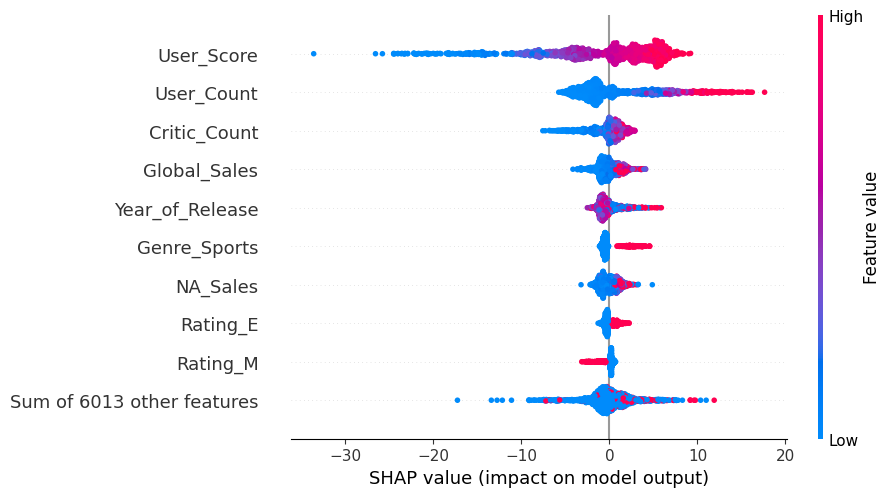

In [ ]:
import shap

# Calculate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP beeswarm plot
shap.plots.beeswarm(shap_values)

#### Insights
One of the important features is NA_Sale. Without considering the other locations, we observed that JP had the most spread. Therefore, we may need to train the data separately for each sales region.

We can also observe this for the sport genre. It seems that this genre is distributed differently and may need to be handled in a different way.

When looking at user score, which is the most important feature, we can see that there are many outliers. We may need to handle these outliers first.

Interestingly, we can see that user score and user count look similar, but are inverted. Most of the data in user score will increase the predicted value, while most of the user count feature will decrease the predicted value.

### D. Overestimations and Underestimations by Price


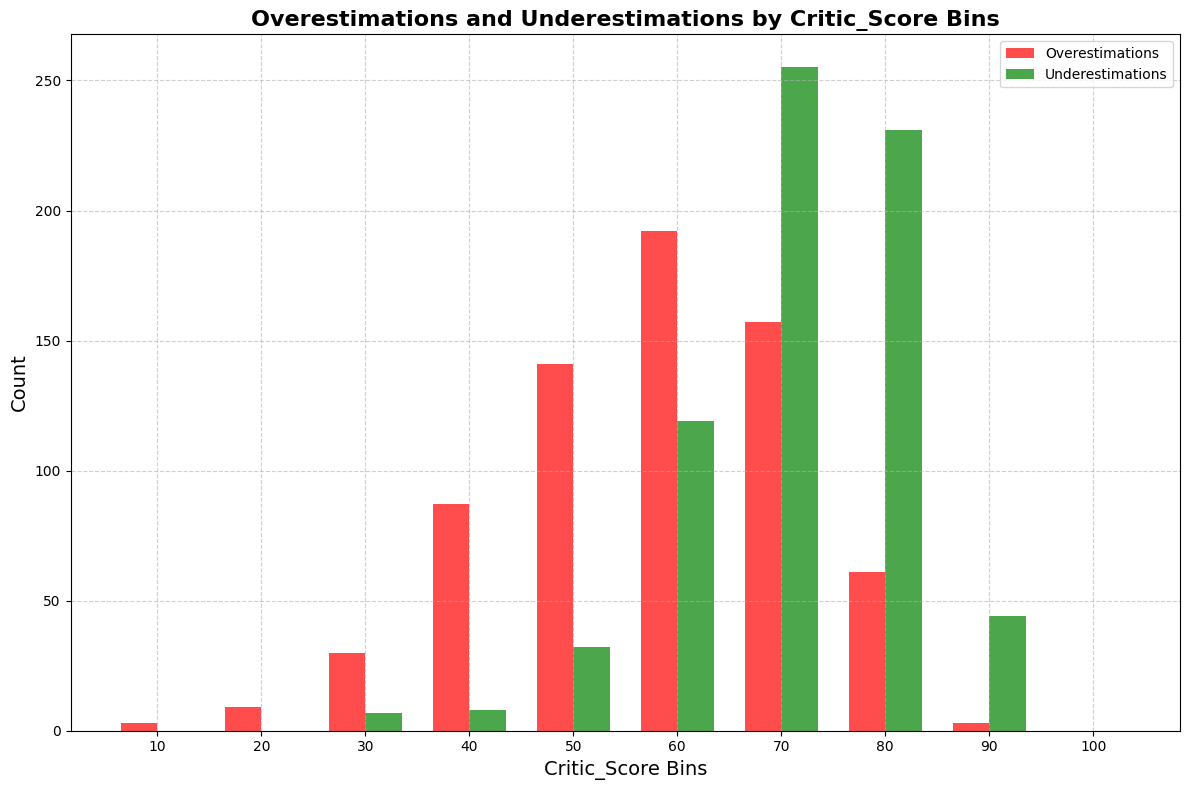

In [ ]:

# Define bins for price ranges
price_bins = [int(x * 10) for x in range(1, 12)]
price_labels = [str(x * 10) for x in range(1, 11)]
y_test_binned = pd.cut(y_test, bins=price_bins, labels=price_labels)

# Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Residual': residuals,
    'Critic_Score Range': y_test_binned
})

# Calculate overestimations and underestimations by price range
over_under_estimations = analysis_df.groupby('Critic_Score Range').apply(
    lambda group: pd.Series({
        'Overestimations': (group['Residual'] < 0).sum(),
        'Underestimations': (group['Residual'] > 0).sum()
    })
).reset_index()

# Plot overestimations and underestimations by price range
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(over_under_estimations))

plt.bar(index, over_under_estimations['Overestimations'], bar_width, label='Overestimations', color='red', alpha=0.7)
plt.bar(index + bar_width, over_under_estimations['Underestimations'], bar_width, label='Underestimations', color='green', alpha=0.7)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Critic_Score Bins', fontsize=14)
plt.title('Overestimations and Underestimations by Critic_Score Bins', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width / 2, over_under_estimations['Critic_Score Range'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **Analysis of the Plot:**
Overestimations vs. Underestimations:

**For lower Critic_Score bins (e.g., 10–50):**

Overestimations dominate. This suggests the model tends to predict higher values for games with low critic scores.

**For higher Critic_Score bins (e.g., 70–90):**

Underestimations are more frequent. This implies the model struggles to predict very high scores accurately and instead predicts lower values.

**Mid-Range Scores (50–70):**

There’s a mix of overestimations and underestimations, though the counts appear more balanced compared to the extremes.
This suggests the model performs relatively well in this range, where it likely has more training data and less noise.

**Outliers in Extremes:**

For the very low (below 20) and very high scores (above 90), errors are minimal in count but significant in magnitude. This indicates these scores are likely underrepresented in the data or harder for the model to capture.

What Can We Learn?

**Model Bias:**

The model tends to overpredict for games with low scores and underpredict for high scores. This indicates a regression-to-the-mean effect, where the model struggles with extreme values and prefers predicting closer to the average.

**Data Distribution Issues:**

The imbalance in over- and underpredictions might reflect uneven data distribution across score ranges. For instance, if mid-range scores dominate the training data, the model may prioritize fitting these at the expense of extreme scores.

**Potential Model Limitations:**

The model might lack features or interactions that effectively differentiate extreme scores (e.g., a high-rated game may have unique traits the model doesn’t capture).

# **Summary:**

The model's performance is suboptimal, likely due to high noise levels in the data, which complicate the learning process. Additionally, the dataset appears to contain many inter-correlated features, increasing its complexity and potentially hindering the model's ability to effectively learn the underlying patterns.

**Recommendations for Improvement:**

Data Preprocessing:
Identify and remove noisy data points that could distort model training.

Feature Selection and Simplification:
Reduce complexity by selecting only the most important features or combining related features into simpler representations.

**Segmentation for Modeling**:

Train separate models for different regions or genres to better capture domain-specific patterns.

**Feature Engineering:**

Introduce additional features that could help the model better capture extreme values, such as interactions between features or external data.

**Hyperparameter Tuning:**

Use techniques like Grid Search or Randomized Search to optimize the parameters of the Random Forest and Gradient Boosting models. This could help the models better handle the complexity in the data

**Dimensionality Reduction:**

Apply techniques like Principal Component Analysis (PCA) to reduce the dimensionality of correlated features while preserving the variance in the data.

**Advanced Modeling Approaches:**

Experiment with other models like XGBoost, LightGBM, or neural networks, which may better capture complex relationships in the data.
